# Emissões de Gases no Brasil

O projeto abaixo irá analisar os dados de emissão de gases de efeito estufa no Brasil. Para que seja possível entendê-los e gerar insights a partir deles, tabelas e visualizações serão criadas.

No decorrer da análise usaremos mais de uma base de dados, pois iremos extrair alguns dados que não estarão disponíveis no nosso DataFrame inicial. 

Os dados foram  extraídos do SEEG (Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa) e do Censo do IBGE.

O acesso pode ser feito em: http://seeg.eco.br e https://www.ibge.gov.br

### Conhecendo os Dados

Primeiro iremos importar as bibliotecas que usaremos no decorrer da nossa análise, além da nossa base de dados. Após a importação iremos visualizar como o DataFrame está distribuído, e poderemos observar mais algumas informações para identificarmos quais dados serão relevantes para o decorrer do projeto.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import xlrd

In [2]:
emissoes_gases = pd.read_excel(
    'seeg/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name='GEE Estados')

c:\Users\anabe\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
emissoes_gases.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [4]:
emissoes_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

### Ajustando a Base de Dados

Na coluna 'Emissão / Remoção / Bunker', temos mais de uma informação, e como o projeto quer identificar os dados apenas sobre a Emissão, precisamos ajustar a base de dados antes de continuar a análise.

Segundo o SEEG:


- *Remoções são dados referentes à retirada dos gases estufa, que é o contrário da emissão*
- *NCI são dados não contemplados no inventário nacional*
- *Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados.*

*Informação disponível no site do SEEG: https://seeg.eco.br/entenda-as-estimativas*



In [5]:
emissoes_gases['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

Checando primeiro os dados de Remoção para saber se realmente correspondem à retirada de gases estufa

In [6]:
(emissoes_gases['Emissão / Remoção / Bunker'] ==
 'Remoção NCI') | (emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção')

0         False
1         False
2         False
3         False
4         False
          ...  
103307    False
103308    False
103309    False
103310    False
103311    False
Name: Emissão / Remoção / Bunker, Length: 103312, dtype: bool

In [7]:
emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker']
               .isin(['Remoção NCI', 'Remoção'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [8]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker']
                   .isin(['Remoção NCI', 'Remoção']), 1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


Abaixo iremos ter certeza que todos os valores são negativos para a Remoção

In [9]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker']
                   .isin(['Remoção NCI', 'Remoção']), 1970:2021].max()

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

No caso abaixo, o Bunker se trata de emissões de transporte marítimo e aéreo internacional, por esse motivo, não podem haver emissões do tipo Bunker nos Estados, e é isso que tentaremos identificar.

In [10]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker']
                   == 'Bunker', 'Estado'].unique()

array([nan], dtype=object)

Conseguimos analisar essa coluna, e ambos os dados de Remoção e Bunker não são relevantes para a continução da nossa análise. Então, para seguir adiante iremos remover essa coluna, para que nos próximos passos haja a criação de uma coluna reservada apenas para a Emissão, que é o dado mais importante para tenhamos os insights sobre a emissão de gases do efeito estufa no Brasil.

In [11]:
emissoes_gases = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] == 'Emissão']
emissoes_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


In [12]:
emissoes_gases = emissoes_gases.drop(columns='Emissão / Remoção / Bunker')
emissoes_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


### Modificando o formato do DataFrame

Após remover a coluna que não seria útil e que poderia gerar algum erro na nossa análise, iremos realizar algumas agregações com os nossos dados. Para realizá-las com os dados de emissão, é necessário que a base de dados esteja em um formato adequado, com os valores de emissão todos em uma mesma coluna, o que não acontecia antes, na coluna em que esse dado estava, já que havia, também, dados de remoção e bunker. Para que os valores de emissão tenham sua própria coluna, vamos modificar o formato da base de dados, desse modo, os dados de anos das emissões irão ser colocados em uma coluna apenas, sendo a base para que seja possível gerar a coluna de valores de emissão.

In [13]:
emissoes_gases.loc[:, 'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [14]:
colunas_info = list(emissoes_gases.loc[:, 'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [15]:
emissoes_gases.loc[:, 1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [16]:
colunas_emissao = list(emissoes_gases.loc[:, 1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [17]:
emissoes_gases.melt(id_vars=colunas_info, value_vars=colunas_emissao,
                    var_name='Ano', value_name='Emissão')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [18]:
emissoes_por_ano = emissoes_gases.melt(
    id_vars=colunas_info, value_vars=colunas_emissao, var_name='Ano', value_name='Emissão')

### Análise dos Gases

Com as transformações necessárias feitas, iremos começar nossa análise. Abaixo vamos identificar a quantidade da emissão total por tipo de gás e, também, qual a porcentagem de emissão que corresponde ao CO2.

In [19]:
emissoes_por_ano.groupby('Gás')

In [20]:
emissoes_por_ano.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [21]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4926255,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,CO2 (t),MS,AGROPEC,NaN,2021,0.000000
4926272,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MT,AGROPEC,NaN,2021,374.000000
4926273,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MS,AGROPEC,NaN,2021,8613.000000
4926290,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2 (t),MT,AGROPEC,NaN,2021,934.000000


In [22]:
emissoes_por_ano.groupby('Gás')[['Emissão']].sum()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [23]:
emissao_por_gas = emissoes_por_ano.groupby(
    'Gás')[['Emissão']].sum().sort_values('Emissão', ascending=False)
emissao_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


<Axes: ylabel='Gás'>

<Figure size 1000x600 with 0 Axes>

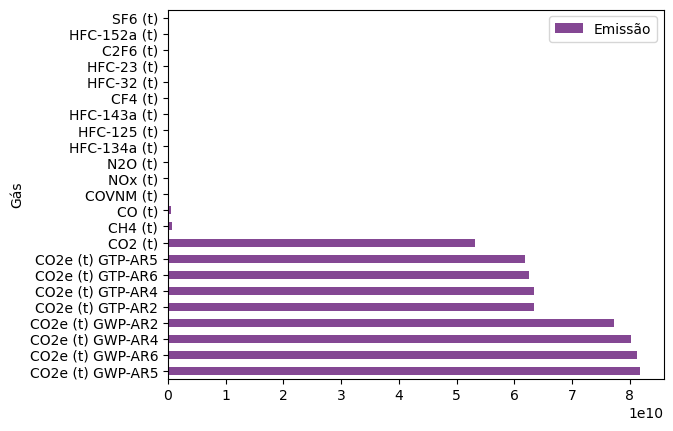

In [24]:
plt.figure(figsize=(10, 6))
emissao_por_gas.plot(kind='barh', color=sns.color_palette('PRGn'))

In [25]:
emissao_por_gas.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [26]:
print(
    f'A emissão de CO2 corresponde a {float((emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum()).iloc[0])*100: .2f} % de emissão total de gases estufa no Brasil de 1970 a 2021.')

A emissão de CO2 corresponde a  99.74 % de emissão total de gases estufa no Brasil de 1970 a 2021.


### Emissões de Gases por Setor

Na próxima sessão, queremos descobrir quais são os setores mais poluentes para cada gás do efeito estufa presente na base de dados, e quais são os gases mais poluentes para cada setor.

In [27]:
gas_por_setor = emissoes_por_ano.groupby(
    ['Gás', 'Nível 1 - Setor'])[['Emissão']].sum()
gas_por_setor

Emissão
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

In [28]:
gas_por_setor.xs('CO2 (t)', level=0)

,Emissão
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [32]:
gas_por_setor.xs('CO2 (t)', level=0).max()

Emissão    3.733930e+10
dtype: float64

In [31]:
gas_por_setor.xs('CO2 (t)', level=0).idxmax()

Emissão    Mudança de Uso da Terra e Floresta
dtype: object

In [33]:
gas_por_setor.groupby(level=0).idxmax()

,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


In [35]:
valores_max = gas_por_setor.groupby(level=0).max()

In [36]:
tabela_sumarizada = gas_por_setor.groupby(level=0).idxmax()
tabela_sumarizada.insert(1, 'Quantidade de Emissão', valores_max)
tabela_sumarizada

,Emissão,Quantidade de Emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


In [38]:
gas_por_setor.swaplevel(0, 1).groupby(level=0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


### Emissão ao Longo dos Anos

Agora, iremos descobrir se as emissões dos gases aumentaram ou diminuíram ao longo dos anos. Será possível visualizar a variação para cade tipo de gás, de forma separada.

In [39]:
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


<Axes: xlabel='Ano'>

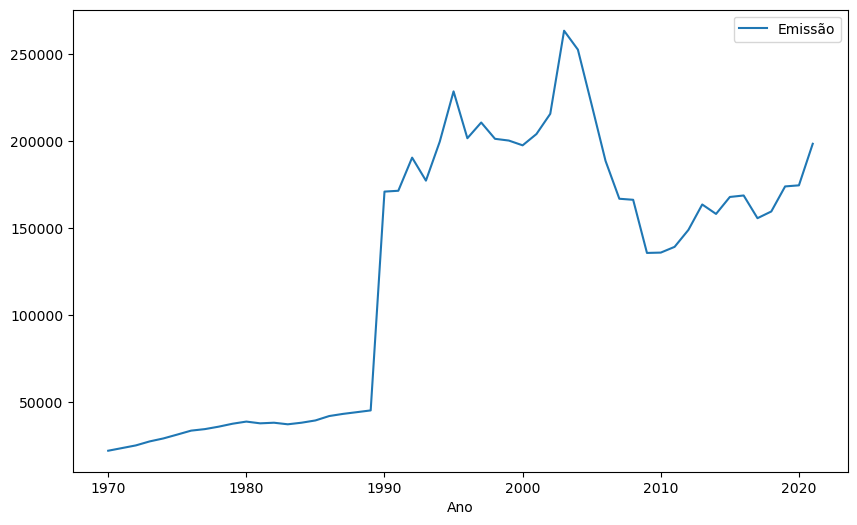

In [41]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().plot(figsize=(10, 6))

No gráfico acima conseguimos identificar um aumento da emissão a partir de 1990, isso acontece, pois, só a partir deste ano que as informações sobre desmatamento (mudança de uso da terra e floresta) começaram a ser informadas. Há também um pico nas emissões entre os anos 2000-2010. Continuando a nossa análise será possível saber qual ano representa o pico mostrado na visualização anterior. Mais a frente iremos visualizar gráficos mostrando como foi o avanço da emissão de cada gás ao longo dos anos.

In [42]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().idxmax()

Emissão    2003
dtype: int64

In [44]:
media_emissao_anual = emissoes_por_ano.groupby(
    ['Ano', 'Gás'])[['Emissão']].mean().reset_index()
media_emissao_anual

,Ano,Gás,Emissão
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [45]:
media_emissao_anual = media_emissao_anual.pivot_table(
    index='Ano', columns='Gás', values='Emissão')
media_emissao_anual

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


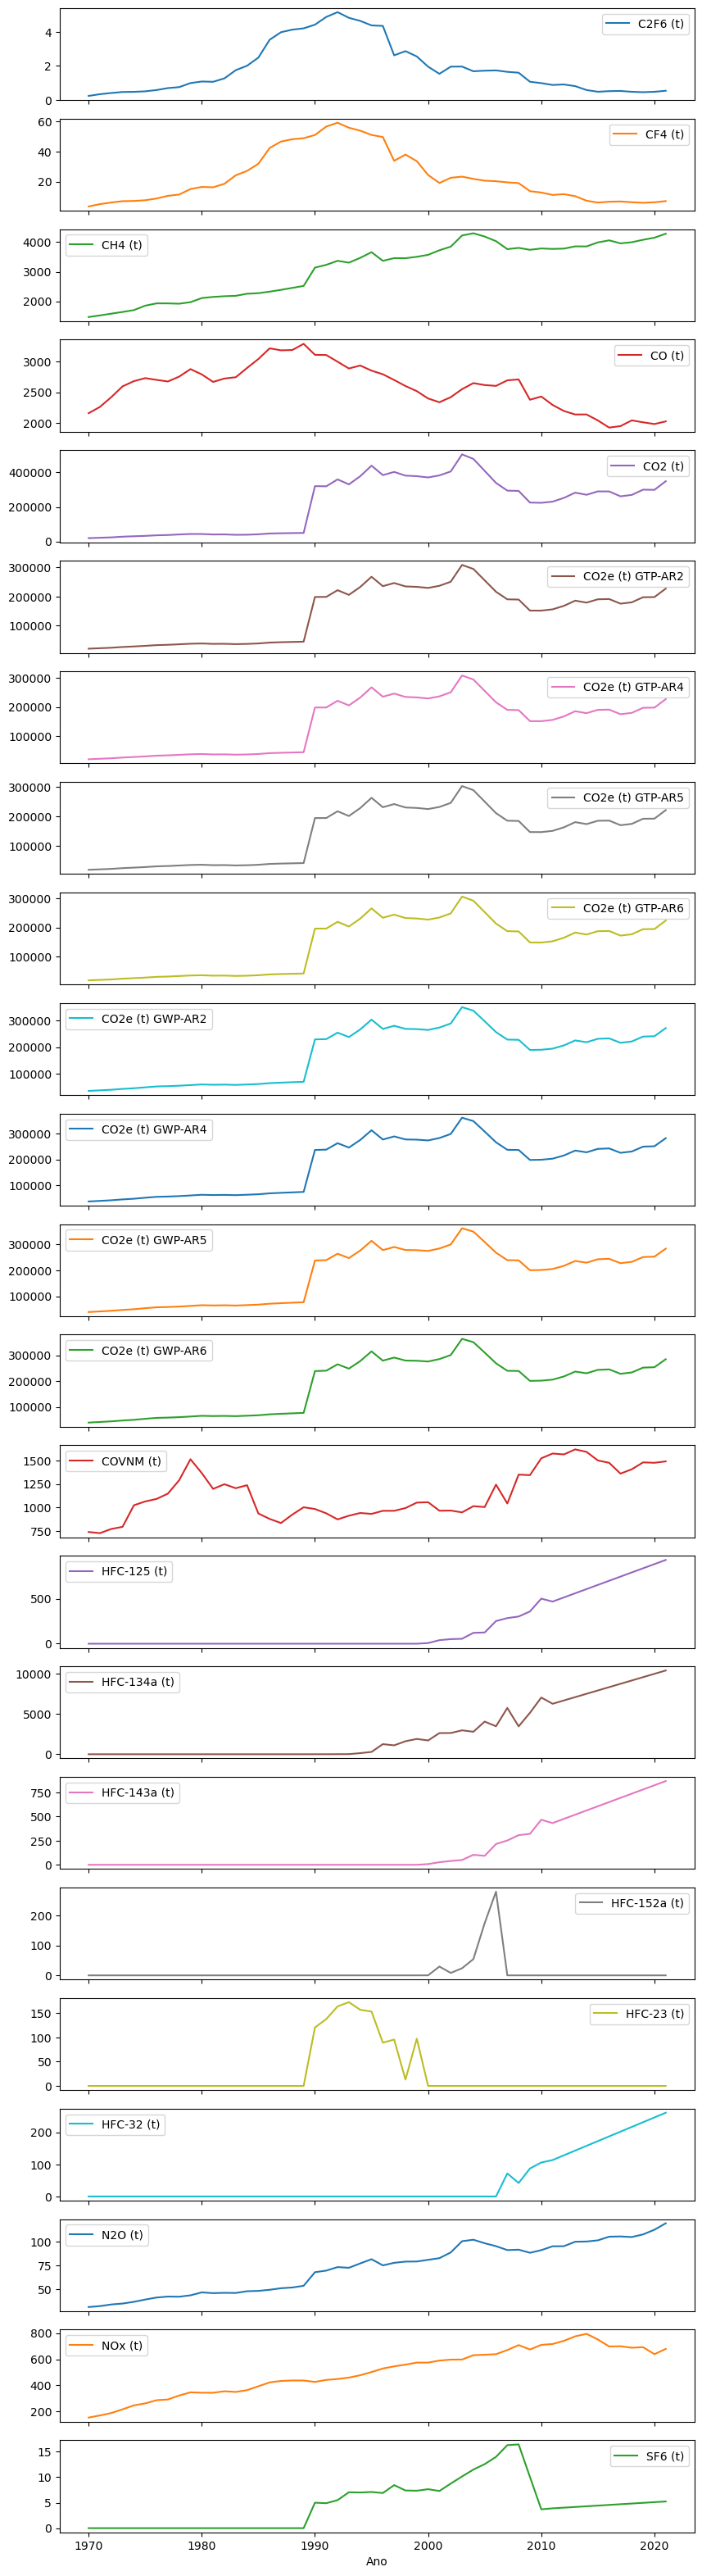

In [47]:
media_emissao_anual.plot(subplots=True, figsize=(10, 40))

### População dos Estados

Nesta etapa, precisamos importar a nossa outra base de dados, obtida do Censo do IBGE. Ela será importante, pois, queremos identificar a emissão de gases dos Estados Per Capita. Algumas transformações e manipulações serão feitas, já que os dados não nos informaram totalmente aquilo que queríamos, além disso, eles estão dividos por municípios, e queremos os dados de todo o Estado.

In [48]:
populacao_estados = pd.read_excel(
    'seeg/POP2022_Municipios.xls', header=1, skipfooter=34)
populacao_estados.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237


In [49]:
populacao_estados.groupby('UF').sum(numeric_only=True)

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


In [50]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na=False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [51]:
populacao_estados = populacao_estados.assign(populacao_sem_parenteses=populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex=True),
                                             populacao=lambda x: x.loc[:, 'populacao_sem_parenteses'].replace('\.', '', regex=True))

In [52]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na=False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [53]:
populacao_estados = populacao_estados.astype({'populacao': 'int64'})

In [54]:
populacao_estados = populacao_estados.groupby(
    'UF')[['populacao']].sum().reset_index()
populacao_estados

,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


### Emissão Per Capita

Com todas as transformações já feitas e tendo um DataFrame que informa a população dos Estados, podemos continuar a análise. A partir daqui iremos visualizar a emissão per capita, ou seja o total de emissão de gases do efeito estufa por Estado, dividido pelo número de indivíduos da população. Vamos mesclar as tabelas que iremos utilizar e vamos criar alguns gráficos, como os de dispersão, que irão nos informar se o quanto maior for a população, também será a emissão. Além disso, poderemos obter insights através da análise dos valores de emissão.

In [55]:
emisssao_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby(
    'Estado')[['Emissão']].sum().reset_index()
emisssao_estados

,Estado,Emissão
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


In [60]:
tabelas_mescladas = pd.merge(
    emisssao_estados, populacao_estados, left_on='Estado', right_on='UF')
tabelas_mescladas

,Estado,Emissão,UF,populacao
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023
5,CE,2.034731e+08,CE,8936431
6,DF,5.668738e+07,DF,2923369
7,ES,2.697547e+08,ES,3975100
8,GO,6.008081e+08,GO,6950976
9,MA,9.476324e+08,MA,6800605


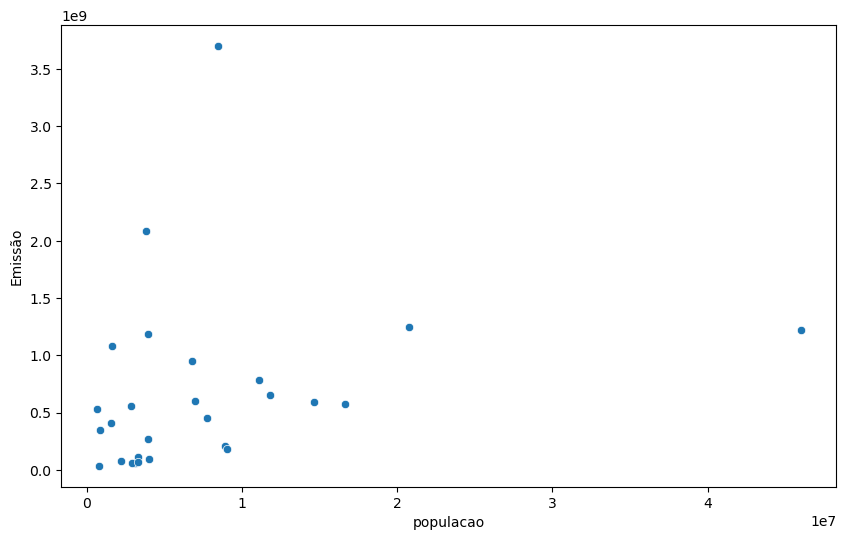

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tabelas_mescladas, x='populacao', y='Emissão')

O gráfico de dispersão acima mostra que afirmar que quando a população é grande, a emissão também se torna grande, não é correto. Mas um problema que encontramos na visualização, é não conseguir identificar quais são os Estados representados, por este motivo, iremos criar logo abaixo um gráfico que seja mais detalhado.

In [69]:
px.scatter(data_frame=tabelas_mescladas, x='populacao',
           y='Emissão', text='Estado', opacity=0)

In [65]:
tabelas_mescladas = tabelas_mescladas.assign(
    emissao_per_capita=tabelas_mescladas['Emissão']/tabelas_mescladas['populacao']).sort_values('emissao_per_capita', ascending=False)
tabelas_mescladas

,Estado,Emissão,UF,populacao,emissao_per_capita
21,RR,5.282071e+08,RR,634805,832.077694
20,RO,1.083515e+09,RO,1616379,670.334662
12,MT,2.081610e+09,MT,3784239,550.073647
13,PA,3.701684e+09,PA,8442962,438.434230
0,AC,3.505471e+08,AC,829780,422.457928
2,AM,1.189649e+09,AM,3952262,301.004463
26,TO,4.082159e+08,TO,1584306,257.662300
11,MS,5.551278e+08,MS,2833742,195.899220
9,MA,9.476324e+08,MA,6800605,139.345312
8,GO,6.008081e+08,GO,6950976,86.435075


In [70]:
px.bar(data_frame=tabelas_mescladas, x='Estado',
       y='emissao_per_capita', color='emissao_per_capita')

In [71]:
px.scatter(data_frame=tabelas_mescladas, x='populacao',
           y='Emissão', text='Estado', size='emissao_per_capita', color='emissao_per_capita')

### Analisando Mais Alguns Dados de Emissão

#### Emissão para Cada Setor Econômico por Ano

In [72]:
emissao_setores = emissoes_por_ano.pivot_table(
    values='Emissão', index='Ano', columns='Nível 1 - Setor', aggfunc='mean')
emissao_setores

Nível 1 - Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
Ano,,,,,
1970,49292.425313,15939.703116,0.000000e+00,106549.168676,11684.883558
1971,51199.559433,17698.989894,0.000000e+00,111532.507753,12676.706849
1972,53508.935498,19092.876761,0.000000e+00,125701.525455,13709.697850
1973,55494.006224,22062.085929,0.000000e+00,137657.110402,14715.248028
1974,57896.513900,23810.659474,0.000000e+00,149941.779638,15710.616150
1975,63303.098508,25036.433686,0.000000e+00,168471.860169,16667.446706
1976,66347.533521,27214.281091,0.000000e+00,193826.482068,17539.505222
1977,66977.413505,27645.258640,0.000000e+00,231505.609283,18462.455148
1978,66640.432009,29734.461056,0.000000e+00,255736.210711,19327.840165


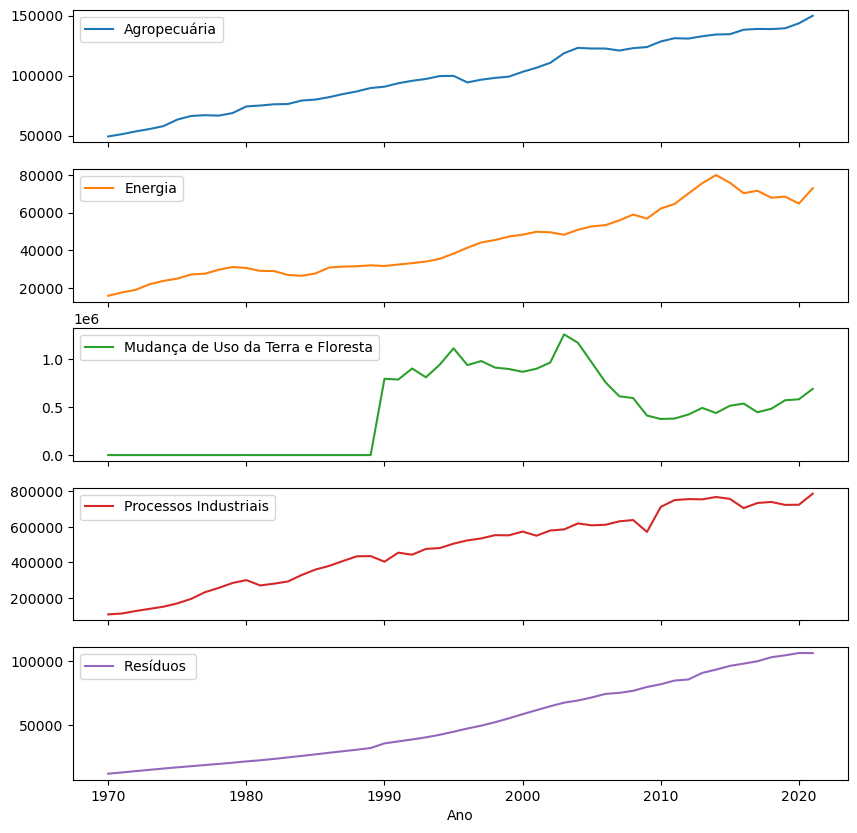

In [78]:
emissao_setores.plot(subplots=True, figsize=(10, 10))

#### Emissão dos Estados por Setor Econômico

In [79]:
emissoes_estado_setor = emissoes_por_ano.groupby(
    ['Estado', 'Nível 1 - Setor'])[['Emissão']].sum()
emissoes_estado_setor

Emissão
Estado Nível 1 - Setor                                 
AC     Agropecuária                        7.270206e+08
       Energia                             2.071751e+08
       Mudança de Uso da Terra e Floresta  7.847879e+09
       Resíduos                            2.928323e+07
AL     Agropecuária                        7.628303e+08
...                                                 ...
TO     Agropecuária                        2.762475e+09
       Energia                             5.130379e+08
       Mudança de Uso da Terra e Floresta  9.435591e+09
       Processos Industriais               2.613905e+07
       Resíduos                            6.177003e+07

[132 rows x 1 columns]

In [84]:
setor_maior_emissao_sp = emissoes_estado_setor.xs('SP', level=0).idxmax()
setor_maior_emissao_sp

Emissão    Energia
dtype: object

In [85]:
emissoes_estado_setor = emissoes_por_ano.groupby(
    ['Estado', 'Nível 1 - Setor'])[['Emissão']].sum()
emissoes_estado_setor.groupby(level=0).idxmax()

,Emissão
Estado,
AC,"(AC, Mudança de Uso da Terra e Floresta)"
AL,"(AL, Agropecuária)"
AM,"(AM, Mudança de Uso da Terra e Floresta)"
AP,"(AP, Mudança de Uso da Terra e Floresta)"
BA,"(BA, Mudança de Uso da Terra e Floresta)"
CE,"(CE, Energia)"
DF,"(DF, Energia)"
ES,"(ES, Processos Industriais)"
GO,"(GO, Agropecuária)"


In [86]:
emissoes_estado_setor = emissoes_por_ano.groupby(
    ['Estado', 'Nível 1 - Setor'])[['Emissão']].sum()
emissoes_estado_setor.groupby(level=1).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(MG, Agropecuária)"
Energia,"(SP, Energia)"
Mudança de Uso da Terra e Floresta,"(PA, Mudança de Uso da Terra e Floresta)"
Processos Industriais,"(MG, Processos Industriais)"
Resíduos,"(SP, Resíduos )"


# Conclusões

A análise das emissões de gases do efeito estufa se torna ainda mais essencial, e importante, dada a situação que o país, e o mundo, vivem, atualmente, com o aumento das temperaturas e dos desastres naturais. 


Ao decorrer do estudo, conseguimos identificar que o CO2 é o gás mais emitido no Brasil, correspondendo a 99.74% das emissões desde 1970, até o ano de 2021. Além disso, foi possível ver que o setor que mais contribui para o aumento dos gases do efeito estufa, é o Mudança de Uso da Terra e Floresta, que se caracteriza pelo desmatamento. O Estado com o maior índice nesse setor, é o Pará, como podemos ver através das análises dos valores e dos gráficos.


Com o uso de visualizações conseguimos identificar como se deu a distribuição das emissões ao decorrer dos anos, e pudemos notar que houve um crescimento a partir de 1990, que foi o ano em que os dados de desmatamento começaram a ser informados. Além de notar esse crescimento, vimos um pico no gráfico de linha, que com uma análise mais aprofundada, indicou que o pico se deu no ano de 2023, sendo assim, podemos considerá-lo o ano como o ano com o maior nível de emissão de gases do efeito estufa.


Mais adiante, consultamos as emissões per capita. A dúvida para essa consulta era se quanto maior a população, maior também seria a emissão. Mas ao longo da nossa análise, e com a ajuda de gráficos, percebemos que o Estado mais populoso, é São Paulo, e a emissão per capita não é tão grande, tornando a afirmação anterior, falsa. Porém, foi também com a ajuda desses gráficos de dispersão que conseguimos ver que o Pará lidera no índice de emissão, mesmo não tendo uma grande população, como é o caso de São Paulo.


Para encerrar, fizemos mais algumas análises referentes aos setores econômicos que indicaram como se deu o aumento em cada um, ao decorrer dos anos. Também pudemos identificar quais Estados possuem a maior emissão quando se trata dos setores.


As informações e insights coletados podem ajudar em planos que visam diminuir os gases do efeito estufa na nossa atmosfera, o que pode ajudar a frear o colapso da ebulição global, que já vivemos.